Select a file to plot:
0: imu-2024-7-5-11-13-41.csv
1: imu-2024-7-5-11-12-9.csv
2: imu-2024-7-5-11-12-14.csv
Index(['time_ms', 'imu_time_ms', 'imu_p', 'imu_q', 'imu_r', 'imu_ax', 'imu_ay',
       'imu_az', 'ext_x', 'ext_y', 'ext_z', 'ext_vx', 'ext_vy', 'ext_vz',
       'ext_qw', 'ext_qx', 'ext_qy', 'ext_qz', 'Unnamed: 18'],
      dtype='object')


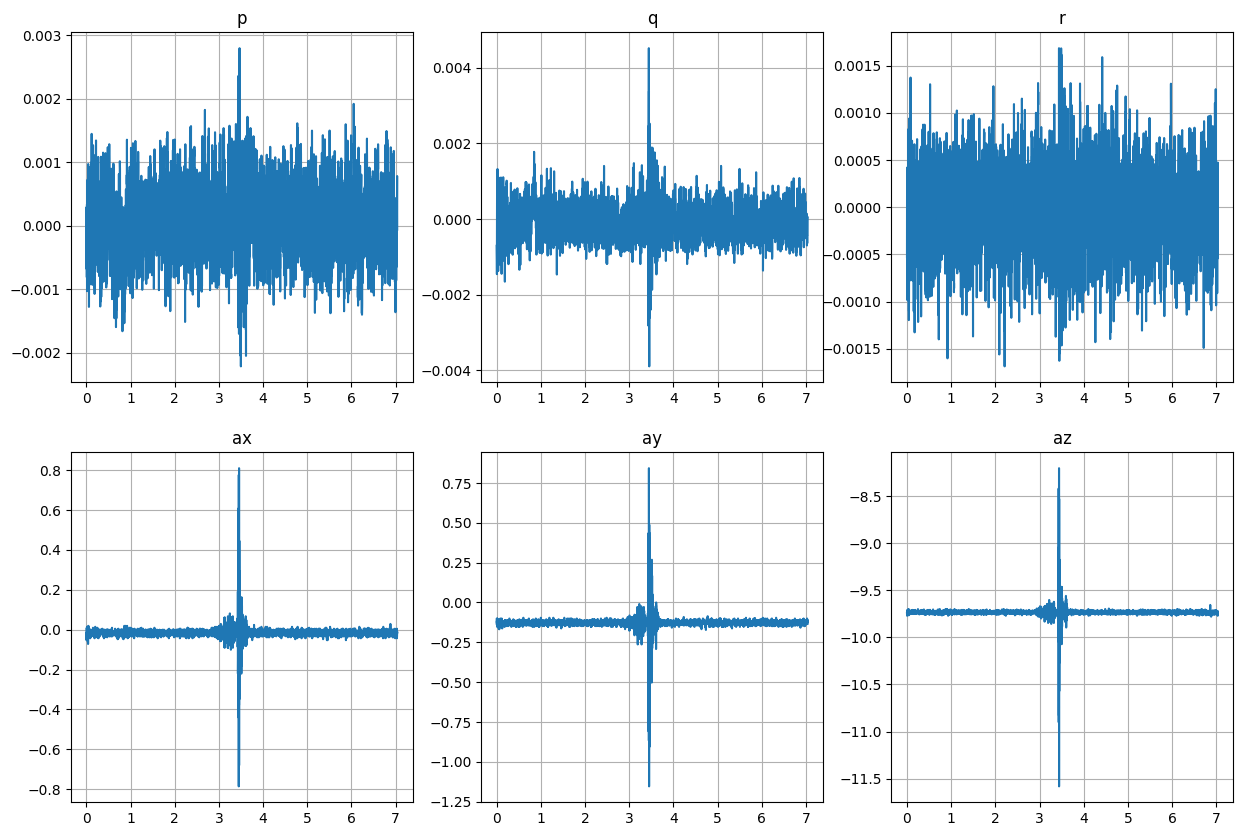

[ 1.  0.  1. ...  1.  0. nan]
nan
IMU frequency: nan Hz


In [14]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get the path to the pi_logs folder
logs_folder = '/home/robinferede/Git/analyze_flight_data/pi_logs'

# Get a list of all log files in the folder
log_files = os.listdir(logs_folder)

# let the user select the file
print('Select a file to plot:')
for i, file in enumerate(log_files):
    print(f'{i}: {file}')
file_index = 2
log_file = log_files[file_index]

# Load the data from the log file
data = pd.read_csv(os.path.join(logs_folder, log_file))
# remove last row
data = data.iloc[:-1]
print(data.keys())

# extra
data['imu_time_ms'] -= data['imu_time_ms'][0]
data['imu_time_s'] = data['imu_time_ms'] / 1000

# Plot the data (for now just the imu)
# time_ms,imu_time_ms, imu_p, imu_q, imu_r, imu_ax, imu_ay, imu_az,ext_x, ext_y, ext_z, ext_vx, ext_vy, ext_vz, ext_qw, ext_qx, ext_qy, ext_qz,
# subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].plot(data['imu_time_s'], data['imu_p'], label='p')
axs[0, 1].plot(data['imu_time_s'], data['imu_q'], label='q')
axs[0, 2].plot(data['imu_time_s'], data['imu_r'], label='r')
axs[1, 0].plot(data['imu_time_s'], data['imu_ax'], label='ax')
axs[1, 1].plot(data['imu_time_s'], data['imu_ay'], label='ay')
axs[1, 2].plot(data['imu_time_s'], data['imu_az'], label='az')
axs[0, 0].set_title('p')
axs[0, 1].set_title('q')
axs[0, 2].set_title('r')
axs[1, 0].set_title('ax')
axs[1, 1].set_title('ay')
axs[1, 2].set_title('az')
for ax in axs.flat:
    ax.grid()
plt.show()

# print extra info
# imu frequency
print(np.diff(data['imu_time_ms']))
imu_dt = np.mean(np.diff(data['imu_time_ms']))*1e-3
print(imu_dt)
imu_freq = 1/imu_dt
print(f'IMU frequency: {imu_freq} Hz')

